# Preços de aluguéis em Belo Horizonte

Fonte: https://www.kaggle.com/datasets/guilherme26/house-pricing-in-belo-horizonte

In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [34]:
data_alugueis = pd.read_csv("/content/drive/MyDrive/Projetos/Aluguéis em Belo Horizonte/data.csv")

In [35]:
data_alugueis.head()

,address,adm-fees,garage-places,price,rooms,square-foot,neighborhood,city,latitude,longitude
0,"Avenida Raja Gabaglia, 1583",470.0,1,330000.0,1,40,Luxemburgo,Belo Horizonte,-19.936415,-43.953396
1,"Rua Espírito Santo, 1171",NaN,1,480000.0,2,45-65,Centro,Belo Horizonte,-18.864776,-41.121777
2,"Rua dos Expedicionários, 1082",NaN,5,1190000.0,4,411,Santa Amélia,Belo Horizonte,-20.225241,-44.397780
3,"Rua Marechal Hermes, 81",750.0,4,1590000.0,4,158,Gutierrez,Belo Horizonte,-19.937155,-43.958694
4,"Rua Juruna, 110",NaN,6,550000.0,3,278,Pindorama,Belo Horizonte,-19.912982,-44.019944


# Tratamento dos dados

In [36]:
data_alugueis.rename(columns = {'address':'Endereco', 'adm-fees': 'Valor_condominio', 'garage-places':'Vagas_garagem', 'price':'Valor_aluguel', 
                       'rooms':'Quartos', 'square-foot':'m2', 'neighborhood':'Bairro', 'city':'Cidade', 'latitude':'Latitude', 'longitude':'Longitude'}, inplace = True)

In [37]:
data_alugueis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5981 entries, 0 to 5980
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Endereco          5981 non-null   object 
 1   Valor_condominio  3977 non-null   float64
 2   Vagas_garagem     5981 non-null   object 
 3   Valor_aluguel     5951 non-null   float64
 4   Quartos           5981 non-null   object 
 5   m2                5981 non-null   object 
 6   Bairro            5957 non-null   object 
 7   Cidade            5981 non-null   object 
 8   Latitude          5981 non-null   float64
 9   Longitude         5981 non-null   float64
dtypes: float64(4), object(6)
memory usage: 467.4+ KB


## Cidade

Tratamento de valores que estão com espaços em excesso.

Seleção da Cidade Belo Horizonte.

In [38]:
data_alugueis["Cidade"].value_counts().index

Index([' Belo Horizonte ', 'Belo Horizonte', ' Contagem ', ' Nova Lima ',
       ' Sabará ', ' Ribeirão das Neves ', ' Lagoa Santa ', ' 461 ', ' 1542 ',
       ' 22 ', ' São Paulo ', ' 1601 ', ' 570 ', ' Divinópolis ', ' 1122 ',
       ' Km 480 ', ' Betim ', ' Santa Luzia ', ' 31 '],
      dtype='object')

In [39]:
data_alugueis["Cidade"] = data_alugueis["Cidade"].str.strip()

In [40]:
data_alugueis["Cidade"].value_counts().index

Index(['Belo Horizonte', 'Contagem', 'Nova Lima', 'Sabará',
       'Ribeirão das Neves', 'Lagoa Santa', '461', '1542', '22', 'São Paulo',
       '1601', '570', '1122', 'Divinópolis', 'Km 480', 'Betim', 'Santa Luzia',
       '31'],
      dtype='object')

In [41]:
# Cidades presentes no dataset
data_alugueis["Cidade"].value_counts()

Belo Horizonte        5949
Contagem                 6
Nova Lima                4
Sabará                   4
Ribeirão das Neves       3
Lagoa Santa              2
461                      2
1542                     1
22                       1
São Paulo                1
1601                     1
570                      1
1122                     1
Divinópolis              1
Km 480                   1
Betim                    1
Santa Luzia              1
31                       1
Name: Cidade, dtype: int64

In [42]:
data_alugueis["Cidade"].value_counts()

Belo Horizonte        5949
Contagem                 6
Nova Lima                4
Sabará                   4
Ribeirão das Neves       3
Lagoa Santa              2
461                      2
1542                     1
22                       1
São Paulo                1
1601                     1
570                      1
1122                     1
Divinópolis              1
Km 480                   1
Betim                    1
Santa Luzia              1
31                       1
Name: Cidade, dtype: int64

In [43]:
data_alugueis = data_alugueis.query("Cidade == 'Belo Horizonte'")
data_alugueis.head()

,Endereco,Valor_condominio,Vagas_garagem,Valor_aluguel,Quartos,m2,Bairro,Cidade,Latitude,Longitude
0,"Avenida Raja Gabaglia, 1583",470.0,1,330000.0,1,40,Luxemburgo,Belo Horizonte,-19.936415,-43.953396
1,"Rua Espírito Santo, 1171",NaN,1,480000.0,2,45-65,Centro,Belo Horizonte,-18.864776,-41.121777
2,"Rua dos Expedicionários, 1082",NaN,5,1190000.0,4,411,Santa Amélia,Belo Horizonte,-20.225241,-44.397780
3,"Rua Marechal Hermes, 81",750.0,4,1590000.0,4,158,Gutierrez,Belo Horizonte,-19.937155,-43.958694
4,"Rua Juruna, 110",NaN,6,550000.0,3,278,Pindorama,Belo Horizonte,-19.912982,-44.019944


## Valor dos condomínios

Imóveis sem condomínio estão com valor nulo, estes valores podem ser subtituídos por zero.

In [44]:
data_alugueis["Valor_condominio"].isna()

0       False
1        True
2        True
3       False
4        True
        ...  
5976    False
5977    False
5978    False
5979    False
5980     True
Name: Valor_condominio, Length: 5949, dtype: bool

In [45]:
data_alugueis["Valor_condominio"].fillna(0, inplace = True)

In [46]:
data_alugueis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5949 entries, 0 to 5980
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Endereco          5949 non-null   object 
 1   Valor_condominio  5949 non-null   float64
 2   Vagas_garagem     5949 non-null   object 
 3   Valor_aluguel     5923 non-null   float64
 4   Quartos           5949 non-null   object 
 5   m2                5949 non-null   object 
 6   Bairro            5925 non-null   object 
 7   Cidade            5949 non-null   object 
 8   Latitude          5949 non-null   float64
 9   Longitude         5949 non-null   float64
dtypes: float64(4), object(6)
memory usage: 511.2+ KB


## Vagas de garagem, Quartos e Metragem

Algumas linhas possuem mais de um valor, no formato x-y. Vou usar apenas o primeiro valor,  preencher os "em branco" por zero e converter para inteiro.

In [47]:
data_alugueis["Vagas_garagem"].unique()

array(['1', '5', '4', '6', '2', '3', '2-3', '--', '1-2', '10', '13',
       '3-4', '7', '2-4', '1-3', '8', '20', '9', '50', '18', '28', '12',
       '15', '25', '40', '22', '11', '46', '19', '17'], dtype=object)

In [48]:
data_alugueis["Vagas_garagem"] = data_alugueis["Vagas_garagem"].str.replace("--", "0")
data_alugueis["Quartos"] = data_alugueis["Quartos"].str.replace("--", "0")
data_alugueis["m2"] = data_alugueis["m2"].str.replace("--", "0")

In [49]:
data_alugueis["Vagas_garagem"] = data_alugueis["Vagas_garagem"].str.split(pat = "-", expand = True)[0]
data_alugueis["Quartos"] = data_alugueis["Quartos"].str.split(pat = "-", expand = True)[0]
data_alugueis["m2"] = data_alugueis["m2"].str.split(pat = "-", expand = True)[0]

In [50]:
data_alugueis["Vagas_garagem"] = data_alugueis["Vagas_garagem"].astype(int)
data_alugueis["Quartos"] = data_alugueis["Quartos"].astype(int)
data_alugueis["m2"] = data_alugueis["m2"].astype(float)

In [51]:
#data_alugueis["Vagas_garagem"].unique()

In [52]:
#data_alugueis["Quartos"].unique()

In [53]:
#data_alugueis["m2"].unique()

In [54]:
data_alugueis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5949 entries, 0 to 5980
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Endereco          5949 non-null   object 
 1   Valor_condominio  5949 non-null   float64
 2   Vagas_garagem     5949 non-null   int64  
 3   Valor_aluguel     5923 non-null   float64
 4   Quartos           5949 non-null   int64  
 5   m2                5949 non-null   float64
 6   Bairro            5925 non-null   object 
 7   Cidade            5949 non-null   object 
 8   Latitude          5949 non-null   float64
 9   Longitude         5949 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 511.2+ KB


## Remoção de Valores de aluguel e Bairros nulos

In [55]:
data_alugueis[data_alugueis["Valor_aluguel"].isnull()].shape[0]

26

In [56]:
data_alugueis[data_alugueis["Bairro"].isnull()].shape[0]

24

In [57]:
data_alugueis.dropna(inplace = True)

In [58]:
data_alugueis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5899 entries, 0 to 5980
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Endereco          5899 non-null   object 
 1   Valor_condominio  5899 non-null   float64
 2   Vagas_garagem     5899 non-null   int64  
 3   Valor_aluguel     5899 non-null   float64
 4   Quartos           5899 non-null   int64  
 5   m2                5899 non-null   float64
 6   Bairro            5899 non-null   object 
 7   Cidade            5899 non-null   object 
 8   Latitude          5899 non-null   float64
 9   Longitude         5899 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 506.9+ KB


In [59]:
data_alugueis.head()

,Endereco,Valor_condominio,Vagas_garagem,Valor_aluguel,Quartos,m2,Bairro,Cidade,Latitude,Longitude
0,"Avenida Raja Gabaglia, 1583",470.0,1,330000.0,1,40.0,Luxemburgo,Belo Horizonte,-19.936415,-43.953396
1,"Rua Espírito Santo, 1171",0.0,1,480000.0,2,45.0,Centro,Belo Horizonte,-18.864776,-41.121777
2,"Rua dos Expedicionários, 1082",0.0,5,1190000.0,4,411.0,Santa Amélia,Belo Horizonte,-20.225241,-44.397780
3,"Rua Marechal Hermes, 81",750.0,4,1590000.0,4,158.0,Gutierrez,Belo Horizonte,-19.937155,-43.958694
4,"Rua Juruna, 110",0.0,6,550000.0,3,278.0,Pindorama,Belo Horizonte,-19.912982,-44.019944


## Separação de Rua e Número

In [60]:
rua_numero = data_alugueis["Endereco"].str.split(pat = ", ", expand = True)
rua_numero[0].isnull().value_counts()

False    5899
Name: 0, dtype: int64

In [61]:
data_alugueis["Rua"] = data_alugueis["Endereco"].str.split(pat = ", ", expand = True)[0]
data_alugueis["Numero"] = data_alugueis["Endereco"].str.split(pat = ", ", expand = True)[1]
data_alugueis.head()

,Endereco,Valor_condominio,Vagas_garagem,Valor_aluguel,Quartos,m2,Bairro,Cidade,Latitude,Longitude,Rua,Numero
0,"Avenida Raja Gabaglia, 1583",470.0,1,330000.0,1,40.0,Luxemburgo,Belo Horizonte,-19.936415,-43.953396,Avenida Raja Gabaglia,1583
1,"Rua Espírito Santo, 1171",0.0,1,480000.0,2,45.0,Centro,Belo Horizonte,-18.864776,-41.121777,Rua Espírito Santo,1171
2,"Rua dos Expedicionários, 1082",0.0,5,1190000.0,4,411.0,Santa Amélia,Belo Horizonte,-20.225241,-44.397780,Rua dos Expedicionários,1082
3,"Rua Marechal Hermes, 81",750.0,4,1590000.0,4,158.0,Gutierrez,Belo Horizonte,-19.937155,-43.958694,Rua Marechal Hermes,81
4,"Rua Juruna, 110",0.0,6,550000.0,3,278.0,Pindorama,Belo Horizonte,-19.912982,-44.019944,Rua Juruna,110


In [62]:
data_alugueis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5899 entries, 0 to 5980
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Endereco          5899 non-null   object 
 1   Valor_condominio  5899 non-null   float64
 2   Vagas_garagem     5899 non-null   int64  
 3   Valor_aluguel     5899 non-null   float64
 4   Quartos           5899 non-null   int64  
 5   m2                5899 non-null   float64
 6   Bairro            5899 non-null   object 
 7   Cidade            5899 non-null   object 
 8   Latitude          5899 non-null   float64
 9   Longitude         5899 non-null   float64
 10  Rua               5899 non-null   object 
 11  Numero            2479 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 599.1+ KB


# Primeiras análises

In [118]:
# Exibições sem notação científica
pd.options.display.float_format = '{:.2f}'.format

### Bairros com maiores médias de aluguel

In [80]:
data_alugueis["Valor_condominio"].mean()

1377.644685539922

In [86]:
top_bairros = data_alugueis["Bairro"].value_counts()[:10].index
top_bairros

Index([' Buritis', ' Lourdes', ' Funcionários', ' Sagrada Família', ' Serra',
       ' Santo Antônio', ' Sion', ' Santo Agostinho', ' Savassi', ' Centro'],
      dtype='object')

In [103]:
grupo_bairros = data_alugueis.groupby("Bairro")

In [128]:
media_aluguel_por_bairro = pd.DataFrame(grupo_bairros['Valor_aluguel'].mean()).rename(columns = {'Valor_aluguel':'Media_valor_aluguel'})
media_aluguel_por_bairro.reset_index(inplace = True)
media_aluguel_por_bairro.head()

,Bairro,Media_valor_aluguel
0,Aeroporto,300000.00
1,Alto Barroca,665357.14
2,Alto dos Caiçaras,602000.00
3,Alto dos Pinheiros,2190000.00
4,Alípio de Melo,577000.00


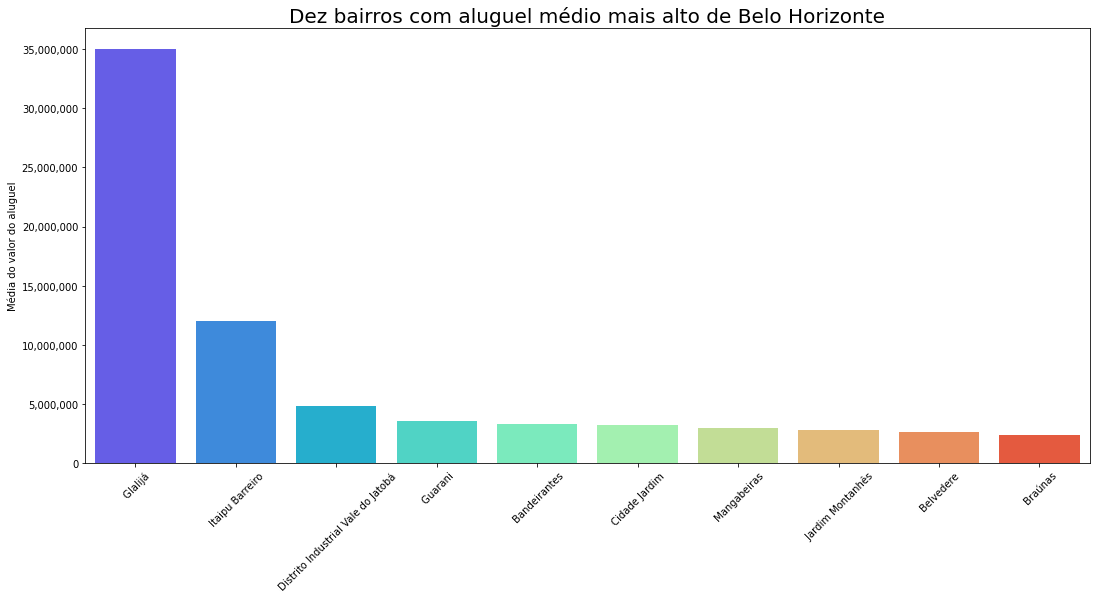

In [153]:
plt.figure(figsize = (18,8))
ax = sns.barplot(data = media_aluguel_por_bairro.sort_values("Media_valor_aluguel", ascending = False)[:10], x = "Bairro", y = "Media_valor_aluguel",
                 palette = 'rainbow')

ax.tick_params(axis = 'x', rotation = 45)
ax.set_title("Dez bairros com aluguel médio mais alto de Belo Horizonte", fontsize = 20)
plt.ylabel("Média do valor do aluguel")
plt.xlabel("")
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x,_ : format(int(x), ',')))

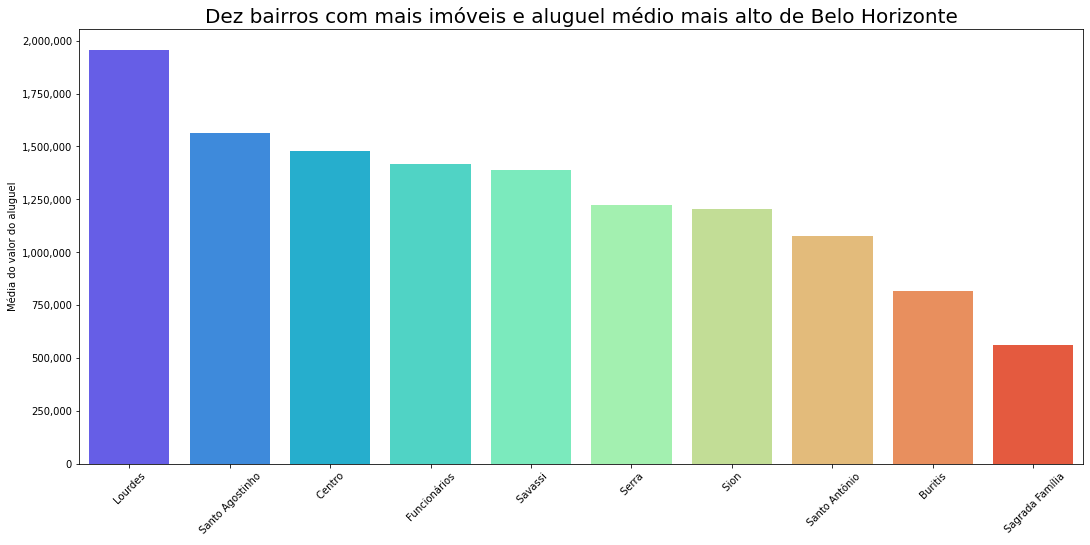

In [155]:
plt.figure(figsize = (18,8))
ax = sns.barplot(data = media_aluguel_por_bairro.sort_values("Media_valor_aluguel", ascending = False).query("Bairro in @top_bairros")[:10], 
                 x = "Bairro", y = "Media_valor_aluguel",
                 palette = 'rainbow')

ax.tick_params(axis = 'x', rotation = 45)
ax.set_title("Dez bairros com mais imóveis e aluguel médio mais alto de Belo Horizonte", fontsize = 20)
plt.ylabel("Média do valor do aluguel")
plt.xlabel("")
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x,_ : format(int(x), ',')))

In [156]:
media_aluguel_por_bairro.sort_values("Media_valor_aluguel", ascending = False).query("Bairro in @top_bairros")[:10]

,Bairro,Media_valor_aluguel
107,Lourdes,1957944.29
173,Santo Agostinho,1562880.14
37,Centro,1479275.46
69,Funcionários,1414884.09
177,Savassi,1390028.40
178,Serra,1223533.79
183,Sion,1202248.01
175,Santo Antônio,1078185.19
21,Buritis,815659.24
158,Sagrada Família,563457.09


In [163]:
grupo_bairros.mean().sort_values("Valor_aluguel")

,Valor_condominio,Vagas_garagem,Valor_aluguel,Quartos,m2,Latitude,Longitude
Bairro,,,,,,,
Ipê,0.00,3.00,1800.00,3.00,360.00,-19.87,-43.91
São Cristóvão,310.00,1.00,95000.00,1.00,42.00,-19.90,-43.95
Castanheira,60.00,0.00,115000.00,2.00,60.00,-20.00,-44.03
Bonsucesso Barreiro,180.00,1.00,120000.00,2.00,65.00,-19.98,-43.99
Granja De Freitas,0.00,1.00,130000.00,3.00,56.00,-19.91,-43.88
...,...,...,...,...,...,...,...
Bandeirantes,17.25,6.44,3277000.00,3.62,47571.31,-19.86,-43.99
Guarani,0.00,0.00,3600000.00,0.00,2400.00,-19.80,-44.03
Distrito Industrial Vale do Jatobá,1.00,20.00,4800000.00,1.00,3637.00,-20.00,-44.03
